# Eddy variance generation along GO-SHIP lines

This notebook just looks to see where the large eddy stirring signal might be.

1. Uses Ke_cole * dTiso \*\* 2;
1. Ke_groeskamp * dTiso \*\* 2;
1. T-S Diagram
1. Surface EKE

In [47]:
import cf_xarray as cfxr
import dcpy
import matplotlib as mpl

import eddydiff as ed
import xarray as xr

mpl.rcParams["figure.dpi"] = 140

In [6]:
colegrad = xr.open_dataset("../datasets/cole-clim-gradient.nc")
cole = ed.read_cole()

In [113]:
def interp_cole(section, cole, colegrad):
    result = xr.Dataset()

    result["Ke"] = cole.diffusivity.interp(
        lat=p06.lat.reset_coords(drop=True), lon=p06.lon.reset_coords(drop=True)
    )
    result.Ke.attrs = {"long_name": "$K_e$", "units": "m²/s"}

    result["dTiso"] = colegrad.dTiso.interp(
        lat=p06.lat.reset_coords(drop=True), lon=p06.lon.reset_coords(drop=True)
    ).interp(pres=cole.pres)
    result.dTiso.attrs = {"long_name": "$|∇T_{iso}|$", "units": "m²/s"}

    result["χe"] = result.Ke * result.dTiso**2
    result.χe.attrs = {"long_name": "$K_e^{cole} |∇T_{iso}^{argo}|²$", "units": "°C²/s"}

    return result

## P06

In [8]:
p06 = xr.open_dataset("/home/deepak/work/eddydiff/datasets/P06/p06.nc")

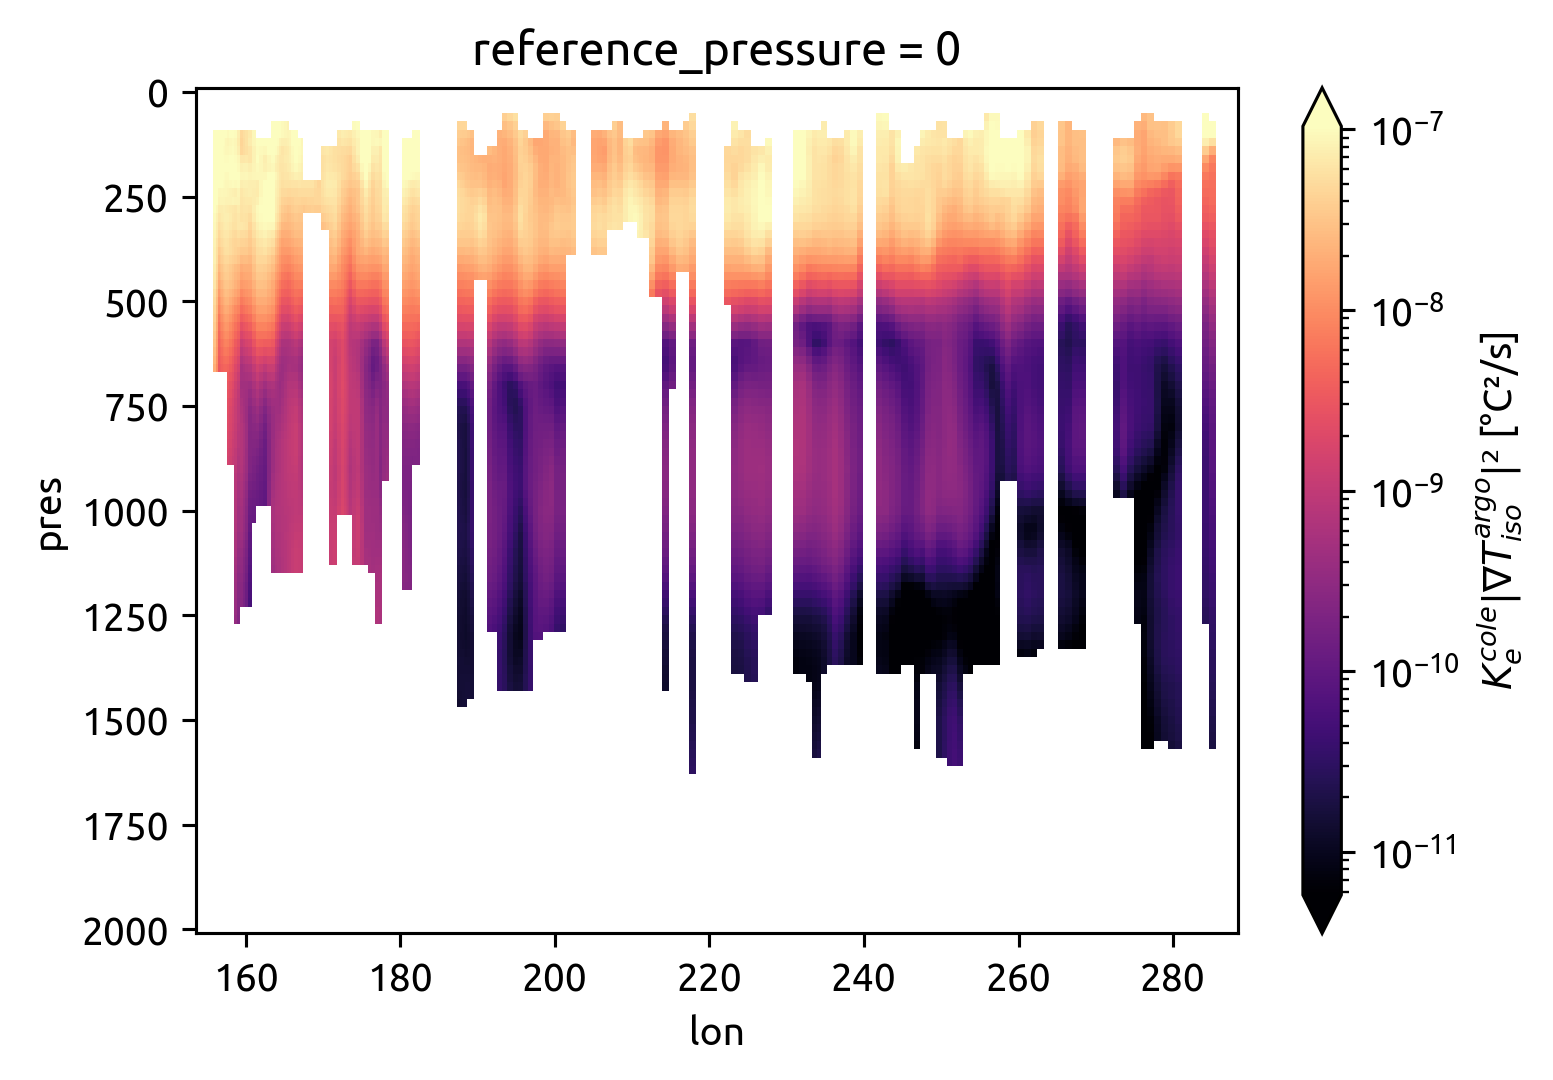

In [115]:
sectionvar = interp_cole(p06, cole, colegrad)
sectionvar.χe.cf.plot(
    robust=True, x="lon", norm=mpl.colors.LogNorm(), cmap=mpl.cm.magma
)

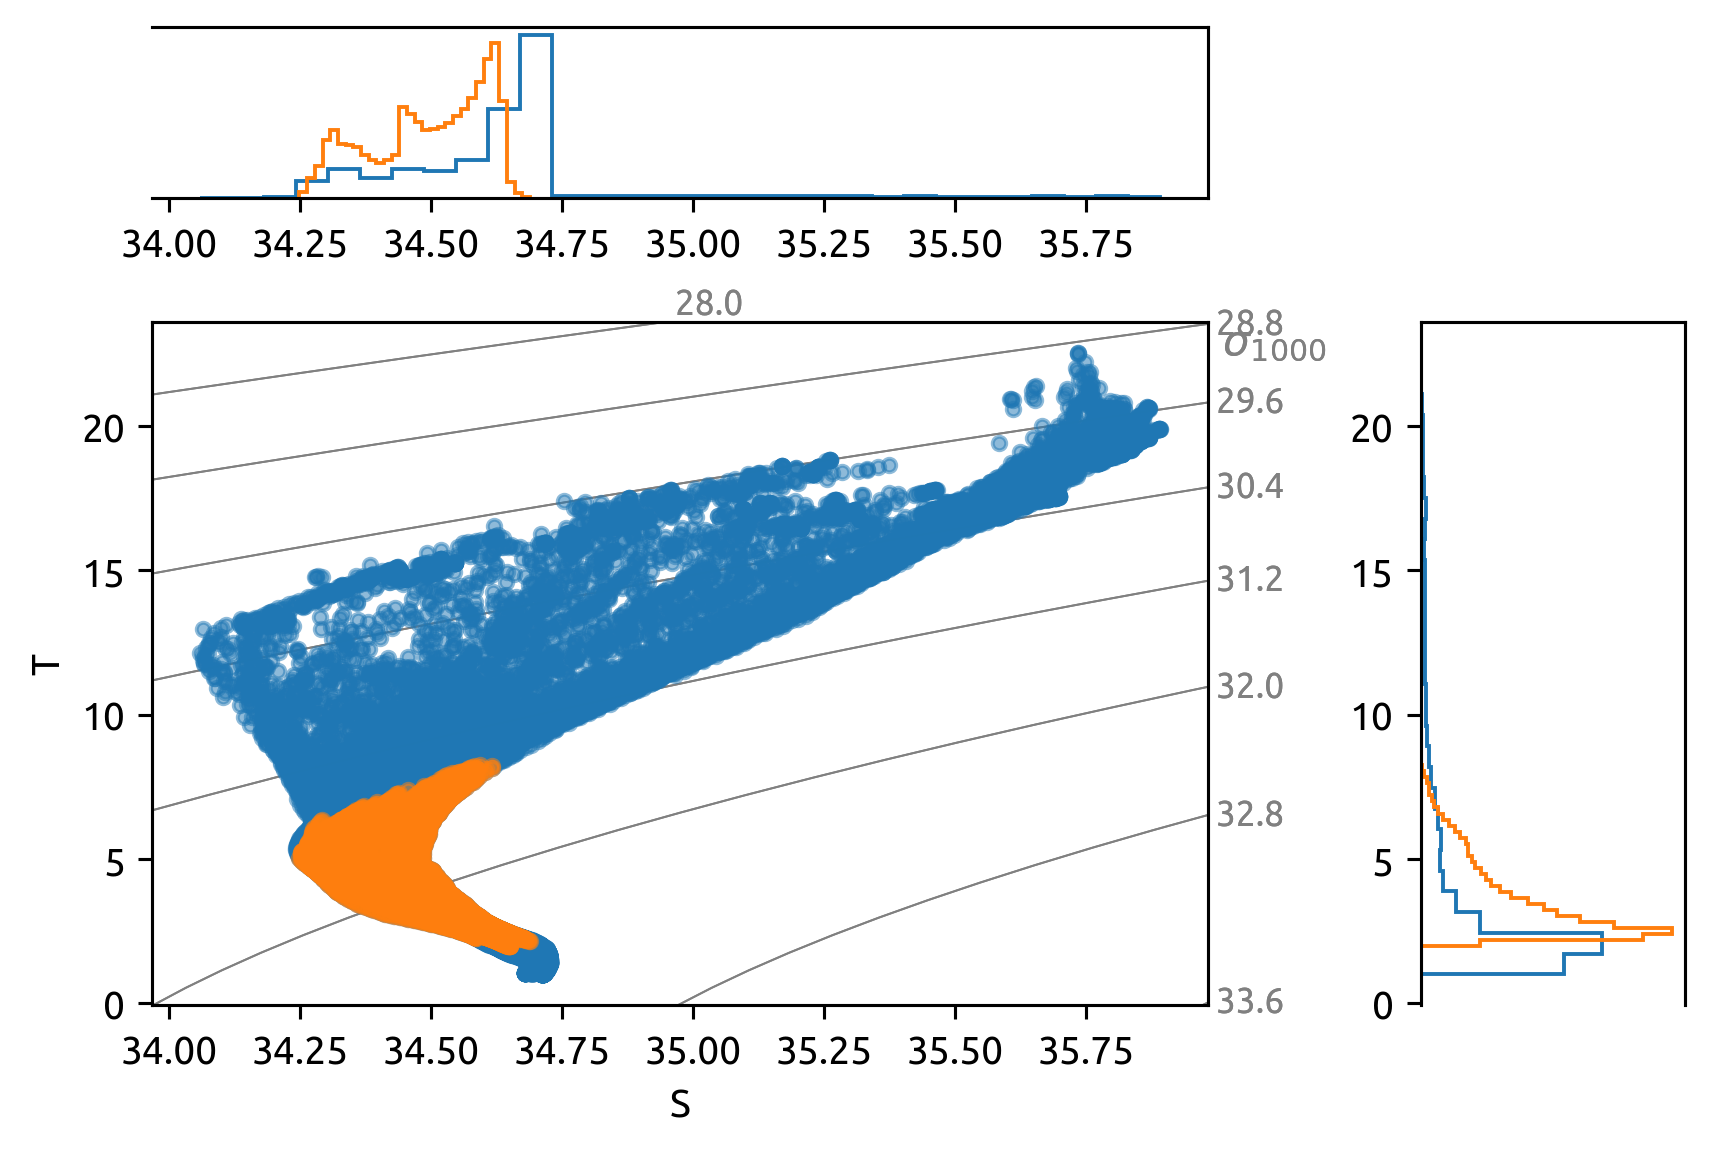

In [78]:
subset = p06  # .where(p06.lon > 180)
_, ax = dcpy.oceans.TSplot(subset.S, subset.T, Pref=1000, hexbin=False, color="C0")

# subset= p06.where( (p06.pres < 500))
# dcpy.oceans.TSplot(subset.S, subset.T, Pref=1000, hexbin=False, color='C0')

subset = p06.where((p06.pres > 750) & (p06.pres < 2050))
dcpy.oceans.TSplot(subset.S, subset.T, Pref=1000, ax=ax, hexbin=False, color="C1");